# Data Loading

In [1]:
import os
import pandas as pd

In [2]:
DF = pd.read_csv('/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv')

In [3]:
columns_to_drop = DF.columns[DF.nunique()==1]
DF_cleaned = DF.drop(columns=columns_to_drop)

# Data Cleaning and Arrangement

In [4]:
DF_cleaned.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [5]:
def ManualOrdinalEncoding(dataframe, column, mapping):
    encoded = dataframe[column].map(mapping)
    dataframe[column] = encoded

In [6]:
AttritionMap = {"No": 0, "Yes": 1}

ManualOrdinalEncoding(DF_cleaned, "Attrition", AttritionMap)

## Ordinal Encoding

In [7]:
Attrition_True = (DF_cleaned.Attrition == 1)

### Business Travel

In [8]:
Non_Travel_Count = (DF_cleaned.BusinessTravel == "Non-Travel")
Travel_Rarely_Count = (DF_cleaned.BusinessTravel == "Travel_Rarely")
Travel_Frequently_Count = (DF_cleaned.BusinessTravel == "Travel_Frequently")

Non_Travel_Attrition_Count = DF_cleaned[Non_Travel_Count&Attrition_True].shape[0]
Travel_Rarely_Attrition_Count = DF_cleaned[Travel_Rarely_Count&Attrition_True].shape[0]
Travel_Frequently_Attrition_Count = DF_cleaned[Travel_Frequently_Count&Attrition_True].shape[0]

In [9]:
print(Non_Travel_Count.sum(), Travel_Rarely_Count.sum(), Travel_Frequently_Count.sum())
print(Non_Travel_Attrition_Count, Travel_Rarely_Attrition_Count, Travel_Frequently_Attrition_Count)

150 1043 277
12 156 69


In [10]:
Travel_Rarely_Frequency = Travel_Rarely_Attrition_Count/Travel_Rarely_Count.sum()
Travel_Frequently_Frequency = Travel_Frequently_Attrition_Count/Travel_Frequently_Count.sum()

print(Travel_Rarely_Frequency, Travel_Frequently_Frequency)

0.14956855225311602 0.2490974729241877


In [11]:
BusinessTravelMap = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}

ManualOrdinalEncoding(DF_cleaned, "BusinessTravel", BusinessTravelMap)

### OverTime

In [12]:
DF_cleaned.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
Over_Time_False_Count = (DF_cleaned.OverTime == "No")
Over_Time_True_Count = (DF_cleaned.OverTime == "Yes")

Over_Time_False_Attrition_Count = DF_cleaned[Over_Time_False_Count&Attrition_True].shape[0]
Over_Time_True_Attrition_Count = DF_cleaned[Over_Time_True_Count&Attrition_True].shape[0]

In [14]:
Over_Time_False_Frequency = Over_Time_False_Attrition_Count/Over_Time_False_Count.sum()
Over_Time_True_Frequency = Over_Time_True_Attrition_Count/Over_Time_True_Count.sum()

print(Over_Time_False_Frequency, Over_Time_True_Frequency)

0.10436432637571158 0.30528846153846156


In [15]:
OverTimeMap = {"No": 0, "Yes": 1}

ManualOrdinalEncoding(DF_cleaned, "OverTime", OverTimeMap)

### MaritalStatus

In [16]:
DF_cleaned.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [17]:
Marital_Status_Single_Count = (DF_cleaned.MaritalStatus == "Single")
Marital_Status_Married_Count = (DF_cleaned.MaritalStatus == "Married")
Marital_Status_Divorced_Count = (DF_cleaned.MaritalStatus == "Divorced")

Marital_Status_Single_Attrition_Count = DF_cleaned[Marital_Status_Single_Count&Attrition_True].shape[0]
Marital_Status_Married_Attrition_Count = DF_cleaned[Marital_Status_Married_Count&Attrition_True].shape[0]
Marital_Status_Divorced_Attrition_Count = DF_cleaned[Marital_Status_Divorced_Count&Attrition_True].shape[0]

In [18]:
Marital_Status_Single_Frequency = Marital_Status_Single_Attrition_Count/Marital_Status_Single_Count.sum()
Marital_Status_Married_Frequency = Marital_Status_Married_Attrition_Count/Marital_Status_Married_Count.sum()
Marital_Status_Divorced_Frequency = Marital_Status_Divorced_Attrition_Count/Marital_Status_Divorced_Count.sum()

In [19]:
print(Marital_Status_Single_Frequency, Marital_Status_Married_Frequency, Marital_Status_Divorced_Frequency)

0.2553191489361702 0.12481426448736999 0.10091743119266056


In [20]:
MaritalStatusMap = {"Single": 2, "Married": 1, "Divorced": 0}

ManualOrdinalEncoding(DF_cleaned, "MaritalStatus", MaritalStatusMap)

## Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
LE = LabelEncoder()

In [23]:
num_col = DF_cleaned.select_dtypes(exclude='object').columns
cat_col = DF_cleaned.select_dtypes(include='object').columns

In [24]:
for col in cat_col:
    DF_cleaned[col] = LE.fit_transform(DF_cleaned[col])

# Exploratory Data Anlaysis

In [25]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
warnings.simplefilter(action="ignore", category=FutureWarning)

## Attrition Status

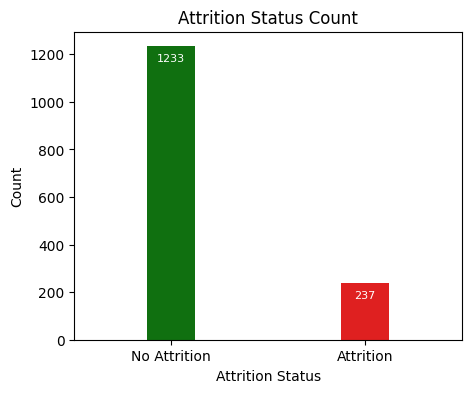

In [27]:
plt.figure(figsize=(5,4))
custom_colour_scheme = {0: "green", 1: "red"}

ax = sns.countplot(x="Attrition", data=DF_cleaned, palette=custom_colour_scheme, width=0.25)
plt.xticks(ticks=[0, 1], labels=["No Attrition", "Attrition"])

plt.title("Attrition Status Count")
plt.xlabel("Attrition Status")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        xy=(p.get_x() + p.get_width()/2, height),
        ha="center",
        va="top",
        xytext=(0, -5),
        textcoords="offset points",
        fontsize=8,
        color="white"
                )

plt.show()

The data is imbalanced, therefore an upsampling must be conducted.

### Age-wise Attrition

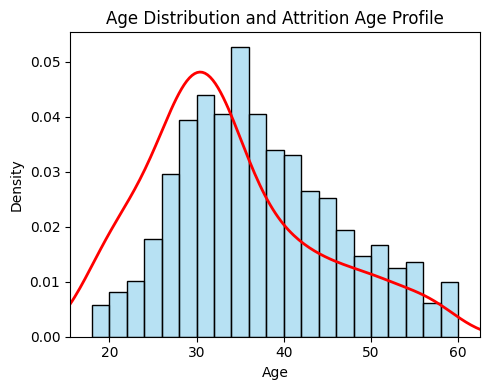

In [28]:
plt.figure(figsize=(5,4))

sns.histplot(
    data=DF_cleaned,
    x="Age",
    bins=21,
    kde=False,
    stat='density',
    color='skyblue',
    alpha=0.6,
    label="Overall Employee Age Distribution"
            )

sns.kdeplot(
    data=DF_cleaned[DF_cleaned.Attrition==1],
    x="Age",
    color="red",
    linewidth=2,
    label="Age Distribution of Attrited Employees"
            )

plt.xlim(DF_cleaned.Age.min()-2.5, DF_cleaned.Age.max()+2.5)

plt.title("Age Distribution and Attrition Age Profile")

plt.tight_layout()
plt.show()

Age frequency data is right skewed, with a greater right skewness in attrition against the respective age bin.

## Data Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
DF_train, DF_test = train_test_split(DF_cleaned, test_size=0.25, train_size=None, random_state=None, shuffle=True, stratify=None)

## Upsample

In [31]:
from sklearn.utils import resample

In [32]:
DF_train_minority = DF_train[DF_train['Attrition']==1]
DF_train_majority = DF_train[DF_train['Attrition']==0]

In [33]:
resampled_DF_train_minority = resample(DF_train_minority, replace=True, n_samples=len(DF_train_majority), random_state=42)

In [34]:
from sklearn.utils import shuffle

In [35]:
resampled_DF_train = pd.concat([resampled_DF_train_minority, DF_train_majority])
resampled_DF_train = resampled_DF_train.sample(frac=1, random_state=42)

In [36]:
X_train, y_train = resampled_DF_train.drop("Attrition", axis=1, inplace=False), resampled_DF_train["Attrition"]
X_test, y_test = DF_test.drop("Attrition", axis=1, inplace=False), DF_test["Attrition"]

# Model Training

In [37]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
def objective(trial):
    """
    Objective function for Optuna to optimize.
    It suggests hyperparameters, trains a RandomForestClassifier, 
    and returns the ROC AUC score on the test set.
    """
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        criterion=criterion,
        random_state=42,
        n_jobs=-1
    )

    classifier.fit(X_train_scaled, y_train)

    y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    return roc_auc

In [40]:
study = optuna.create_study(direction='maximize')

print("\nStarting hyperparameter optimization...")
study.optimize(objective, n_trials=50)

print("\nOptimization finished.")
print(f"Number of finished trials: {len(study.trials)}")

print("\nBest trial:")
trial = study.best_trial

print(f"  Value (ROC AUC): {trial.value:.4f}")
print("  Best hyperparameters:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-07-14 11:41:47,740] A new study created in memory with name: no-name-b09cb55f-af66-4468-bb95-c7f8faf5df54



Starting hyperparameter optimization...


[I 2025-07-14 11:41:48,715] Trial 0 finished with value: 0.8266100495399858 and parameters: {'n_estimators': 314, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8266100495399858.
[I 2025-07-14 11:41:50,047] Trial 1 finished with value: 0.8321538098608161 and parameters: {'n_estimators': 393, 'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 8, 'criterion': 'gini'}. Best is trial 1 with value: 0.8321538098608161.
[I 2025-07-14 11:41:51,478] Trial 2 finished with value: 0.8342769521113471 and parameters: {'n_estimators': 413, 'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8342769521113471.
[I 2025-07-14 11:41:52,473] Trial 3 finished with value: 0.8328025477707006 and parameters: {'n_estimators': 281, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 12, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8342769521113471


Optimization finished.
Number of finished trials: 50

Best trial:
  Value (ROC AUC): 0.8424
  Best hyperparameters:
    n_estimators: 340
    max_depth: 8
    min_samples_leaf: 4
    min_samples_split: 11
    criterion: entropy


In [41]:
print("Training final model with best hyperparameters...")
best_params = study.best_params
final_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)

final_classifier.fit(X_train_scaled, y_train)

Training final model with best hyperparameters...


RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=11, n_estimators=340, n_jobs=-1,
                       random_state=42)

In [42]:
y_pred_proba_final = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred_final = final_classifier.predict(X_test_scaled)

final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"Final Model ROC AUC on test set: {final_roc_auc:.4f}")
print(f"Final Model Accuracy on test set: {final_accuracy:.4f}")

Final Model ROC AUC on test set: 0.8424
Final Model Accuracy on test set: 0.8560


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       314
           1       0.51      0.52      0.51        54

    accuracy                           0.86       368
   macro avg       0.71      0.72      0.71       368
weighted avg       0.86      0.86      0.86       368


Confusion Matrix:
[[287  27]
 [ 26  28]]


On the basis of above evaluation metrics we can conclude that the model is fit enough to be used for predicting on unseen data.